<a href="https://colab.research.google.com/github/vvvipindsm/Interview/blob/master/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:

import pandas as pd
!pip install yfinance

import matplotlib.pyplot as plt
import warnings
import yfinance

warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [234]:
nifty_raw_data = yfinance.download (tickers = "^NSEI", start = "2000-01-08", 
                              end = "2022-06-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)
stocks_raw_data = yfinance.download (tickers = "KPIGREEN.NS", start = "2000-01-08", 
                              end = "2022-06-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [235]:
df_comp = nifty_raw_data.copy()
df_stock = stocks_raw_data.copy()

df_stock=df_stock.asfreq('b')
df_stock=df_stock.fillna(method='ffill')

df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp = df_comp[-len(df_stock):]
df_comp['kpi'] = df_stock.Close[:]
df_comp['Qkpi'] = df_stock.Volume[:]
df_comp['nifty'] = df_comp.Close[:]

df_comp['ret_nifty'] = df_comp.nifty.pct_change(1).mul(100)
df_comp['norm_ret_nifty'] = df_comp.ret_nifty.div(df_comp.ret_nifty[1])*100

# # kpi
df_comp['ret_kpi'] = df_comp.kpi.pct_change(1).mul(100)
df_comp['norm_ret_kpi'] = df_comp.ret_kpi.div(df_comp.ret_kpi[1])*100

# # kpi volumn
df_comp['ret_Qkpi'] = df_comp.Qkpi.pct_change(1).mul(100)
df_comp['norm_ret_Qkpi'] = df_comp.ret_Qkpi.div(df_comp.ret_Qkpi[1])*100


df_comp.head()

,Open,High,Low,Close,Volume,kpi,Qkpi,nifty,ret_nifty,norm_ret_nifty,ret_kpi,norm_ret_kpi,ret_Qkpi,norm_ret_Qkpi
Date,,,,,,,,,,,,,,
2021-07-27,15860.500000,15881.549805,15701.000000,15746.450195,311000.0,125.572395,277005.0,15746.450195,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-28,15761.549805,15767.500000,15513.450195,15709.400391,318600.0,126.266182,526956.0,15709.400391,-0.235290,100.000000,0.552499,100.000000,90.233389,100.000000
2021-07-29,15762.700195,15817.349609,15737.799805,15778.450195,401600.0,126.959946,312237.0,15778.450195,0.439544,-186.809770,0.549445,99.447256,-40.747045,-45.157392
2021-07-30,15800.599609,15862.799805,15744.849609,15763.049805,400000.0,133.302979,524928.0,15763.049805,-0.097604,41.482425,4.996090,904.270764,68.118448,75.491400
2021-08-02,15874.900391,15892.900391,15834.650391,15885.150391,244800.0,139.943359,63463.0,15885.150391,0.774600,-329.210927,4.981420,901.615551,-87.910151,-97.425301


In [237]:


#divide into train and validation set

size = int(len(df_comp)*0.8)
train, valid = df_comp.iloc[:size], df_comp.iloc[size:]
train = df_comp
# train.head()

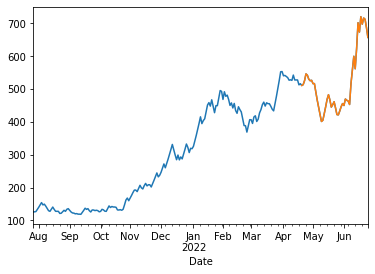

In [238]:
# plotting the data
train['kpi'].plot()
valid['kpi'].plot()
plt.show()

In [220]:
#building the model
!pip install pmdarima
from pmdarima.arima import auto_arima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [239]:
train.head()
model = auto_arima(train.ret_kpi[4:],exogenous = train[['ret_nifty','ret_Qkpi']][4:], 
                   trace=True, error_action='ignore', suppress_warnings=True, m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
model.fit(train.ret_kpi[4:])



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=1304.205, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=1303.281, Time=0.22 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=1295.935, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=1296.376, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=1310.799, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[5] intercept   : AIC=1294.669, Time=0.12 sec
 ARIMA(1,0,0)(0,0,1)[5] intercept   : AIC=1295.918, Time=0.44 sec
 ARIMA(1,0,0)(1,0,1)[5] intercept   : AIC=1297.888, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[5] intercept   : AIC=1296.671, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[5] intercept   : AIC=1296.738, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[5] intercept   : AIC=1294.984, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[5] intercept   : AIC=1298.705, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[5]             : AIC=1298.729, Time=0.22 sec

Best model:  ARIMA(1,0,0)(0,0,0)[5] intercept
Total fit time: 4.781 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True)

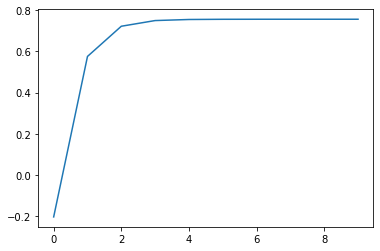

In [240]:
forecast = model.predict(n_periods=10)

forecast = pd.DataFrame(forecast)
# print(forecast)
# predic_data = data + forecast
# plot the predictions for validation set
# plt.plot(train, label='Train')
# plt.plot(valid, label='Valid')
# print(forecast)
plt.plot(forecast, label='Prediction')
plt.show()